In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, figure

Firstly, I want to load in the combined dataset I made containing all food and drinks items. I have already uploaded this file to this notebook.

In [8]:
# Read in combined data
combined_data = pd.read_csv("combined_data")
combined_data.columns = ['Name', 'Calories', 'Fat (g)', 'Carbs (g)', 'Fiber (g)', 'Protein (g)', 'Sodium', 'Type']
print(combined_data.head())

                                     Name  Calories  Fat (g)  Carbs (g)  \
0                            8-Grain Roll       380      6.0         70   
1                        Almond Croissant       410     22.0         45   
2                           Apple Fritter       460     23.0         56   
3                        Banana Nut Bread       420     22.0         52   
4  Blueberry Muffin with Yogurt and Honey       380     16.0         53   

   Fiber (g)  Protein (g)  Sodium  Type  
0          7           10       0  food  
1          3           10       0  food  
2          2            7       0  food  
3          2            6       0  food  
4          1            6       0  food  


For my first visualistaion, I want to compare the average content of Fat, Carbs, Fibre and Protein for food and drink.

In [38]:
# Get the average count for each, grouped by type, transpose it
average_values = combined_data.groupby('Type')[['Fat (g)', 'Carbs (g)', 'Fiber (g)', 'Protein (g)']].mean().transpose()
print(average_values)

Type             drink       food
Fat (g)       2.336957  16.455357
Carbs (g)    24.739130  41.410714
Fiber (g)     0.445652   2.848214
Protein (g)   4.152174  11.464286


<Figure size 1000x600 with 0 Axes>

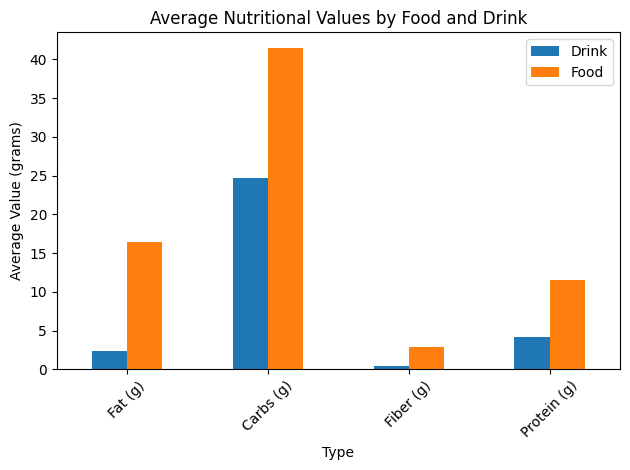

In [37]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Bar chart
average_values.plot(kind='bar')
plt.title('Average Nutritional Values by Food and Drink')
plt.xlabel('Type')
plt.ylabel('Average Value (grams)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(['Drink', 'Food'])

# Save plot
plt.tight_layout()
plt.savefig('nutrition_values_food_vs_drink.png')

# Show the plot
plt.show()

My next visualisation is to see the percentage of drinks that have a Nonfat option

In [39]:
# Load in extended drinks data
extended_drinks = pd.read_csv("extended_drinks")
extended_drinks.columns = [
    "Beverage Category", "Beverage", "Beverage Prep", "Calories",
    "Total Fat (g)", "Trans Fat (g)", "Saturated Fat (g)", "Sodium (mg)",
    "Total Carbohydrates (g)", "Cholesterol (mg)", "Dietary Fibre (g)",
    "Sugars (g)", "Protein (g)", "Vitamin A (% DV)", "Vitamin C (% DV)",
    "Calcium (% DV)", "Iron (% DV)", "Caffeine (mg)"
]
print(extended_drinks.head())

         Beverage Category       Beverage      Beverage Prep  Calories  \
0                   Coffee  Brewed Coffee               Tall         4   
1                   Coffee  Brewed Coffee             Grande         5   
2                   Coffee  Brewed Coffee              Venti         5   
3  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
4  Classic Espresso Drinks    Caffè Latte            2% Milk       100   

   Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0            0.1            0.0                0.0            0   
1            0.1            0.0                0.0            0   
2            0.1            0.0                0.0            0   
3            0.1            0.1                0.0            5   
4            3.5            2.0                0.1           15   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                       10                 0                  0          

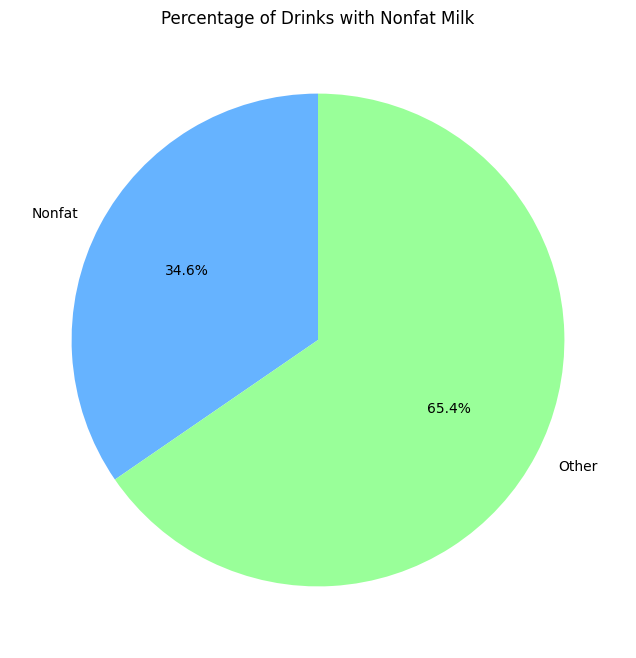

In [44]:
# Create Pie Chart

# Get count of drinks containing Nonfat milk
nonfat_count = len(extended_drinks[extended_drinks["Beverage Prep"].str.contains("Nonfat")])

# Count the total number of rows in the DataFrame
total_rows = len(extended_drinks)

# Calculate the percentage of rows with 'Nonfat' in 'Beverage Prep'
nonfat_percentage = (nonfat_count / total_rows) * 100

# Data for the pie chart
sizes = [nonfat_percentage, 100 - nonfat_percentage]
labels = ['Nonfat', 'Other']
colors = ['#66b3ff', '#99ff99']  # Blue for Nonfat, Green for Other

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Drinks with Nonfat Milk')

# Save
plt.savefig("nonfat_pie_chart.png")

# Show
plt.show()